In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Graficos

In [2]:
df = pd.read_csv("../datos/df_modificado.csv", index_col = 0)


df.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,remotework
0,52,No,non-travel,2015.7,desconocido,6,3,desconocido,1,1,1,M,252.0,3,5,research director,3,desconocido,16280.83,42330.17,7,No,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,16280.83,1972,195370.0,desconocido,True
1,53,No,non-travel,2063.4,desconocido,1,4,life sciences,1,2,3,M,257.9,2,5,manager,3,desconocido,NaN,43331.17,0,Desconocido,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,NaN,1971,199990.0,desconocido,False
2,43,No,travel_rarely,1984.3,research & development,4,2,technical degree,1,3,3,M,248.0,3,5,manager,4,married,NaN,41669.33,1,No,11,3.0,4,full time,0,22.0,3,NaN,22,11,15,NaN,1981,192320.0,manager - research & development,False
3,48,No,travel_rarely,1771.4,desconocido,2,4,medical,1,4,1,F,221.4,3,4,research director,3,married,14307.50,37199.50,3,Desconocido,19,3.0,2,full time,2,NaN,2,NaN,20,5,6,14307.50,1976,171690.0,desconocido,False
4,47,No,non-travel,1582.8,desconocido,3,3,technical degree,1,5,1,F,197.8,4,4,sales executive,1,divorced,12783.92,33238.20,2,No,12,3.0,4,full time,1,NaN,5,3.0,19,2,8,12783.92,1977,NaN,desconocido,True


In [3]:
df["worklifebalance"].dtype

dtype('float64')

In [4]:
porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
porc_nulos

age                          0.000000
attrition                    0.000000
businesstravel               0.000000
dailyrate                    0.000000
department                   0.000000
distancefromhome             0.000000
education                    0.000000
educationfield               0.000000
employeecount                0.000000
employeenumber               0.000000
environmentsatisfaction      0.000000
gender                       0.000000
hourlyrate                   0.000000
jobinvolvement               0.000000
joblevel                     0.000000
jobrole                      0.000000
jobsatisfaction              0.000000
maritalstatus                0.000000
monthlyincome               29.141836
monthlyrate                  0.000000
numcompaniesworked           0.000000
overtime                     0.000000
percentsalaryhike            0.000000
performancerating           11.918951
relationshipsatisfaction     0.000000
standardhours                0.000000
stockoptionl

In [5]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
monthlyincome,29.141836
performancerating,11.918951
totalworkingyears,32.717521
worklifebalance,6.793802
sameasmonthlyincome,29.141836
salary,16.984505


In [6]:
columnas = df.describe().columns
columnas

Index(['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'sameasmonthlyincome', 'datebirth', 'salary'],
      dtype='object')

In [7]:
columnas2 = ["salary", "percentsalaryhike", "worklifebalance", "distancefromhome", "dailyrate", "totalworkingyears", "yearssincelastpromotion", "monthlyincome"]

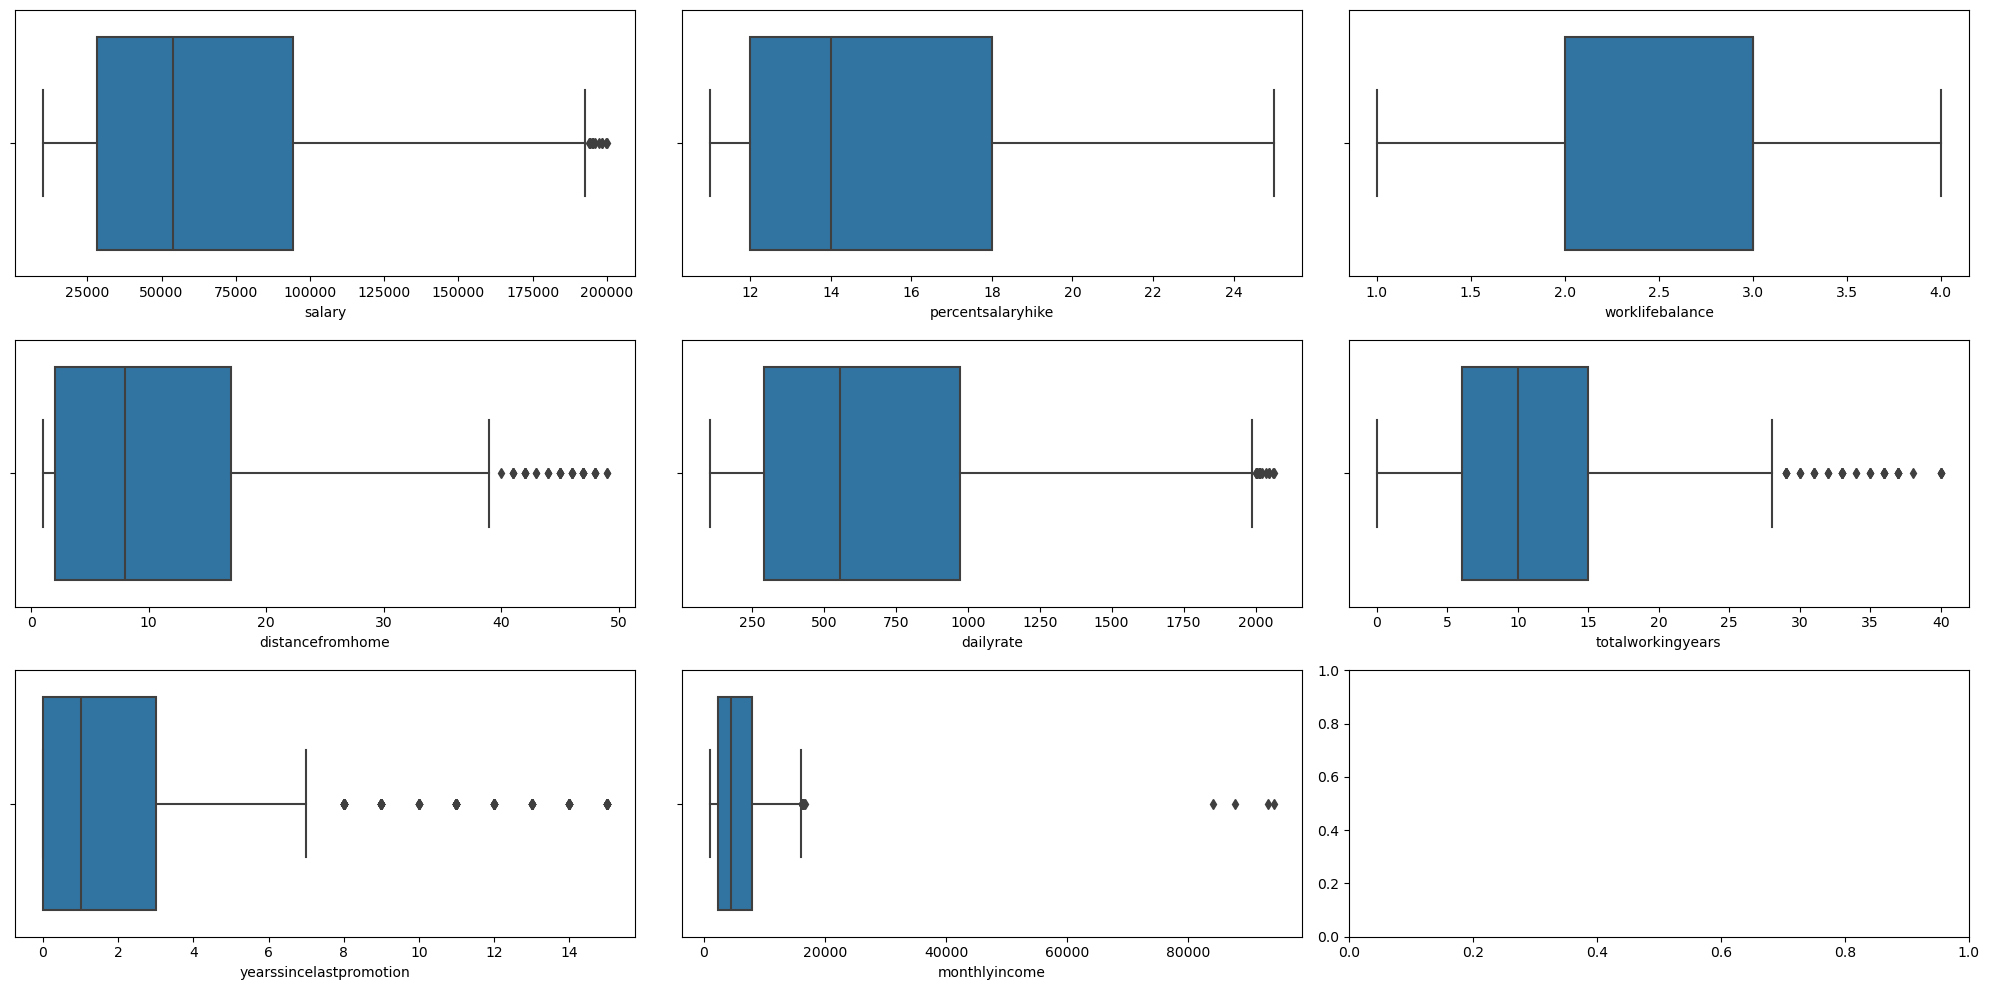

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,10)) 
axes = axes.flat
for indice, col in enumerate(columnas2):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout();

In [9]:
mediana_salary = df["salary"].median()

In [10]:
df["salary"] = df["salary"].fillna(mediana_salary)

In [11]:
df["salary"].describe()[["mean", "50%"]]

mean    63175.984023
50%     53914.110000
Name: salary, dtype: float64

---

In [12]:
mediana_monthlyincome = df["monthlyincome"].median()

In [13]:
df["monthlyincome"] = df["monthlyincome"].fillna(mediana_monthlyincome)

In [14]:
df["monthlyincome"].describe()[["mean", "50%"]]

mean    5331.763159
50%     4492.840000
Name: monthlyincome, dtype: float64

---

In [15]:
mediana_worklifebalance = df["worklifebalance"].mean()

In [16]:
df["worklifebalance"] = df["worklifebalance"].fillna(mediana_worklifebalance)

In [17]:
df["worklifebalance"].describe()[["mean", "50%"]]

mean    2.759591
50%     3.000000
Name: worklifebalance, dtype: float64

---

# df-Satisfecho / df-No Satisfecho

In [18]:
df.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,remotework
0,52,No,non-travel,2015.7,desconocido,6,3,desconocido,1,1,1,M,252.0,3,5,research director,3,desconocido,16280.83,42330.17,7,No,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,16280.83,1972,195370.0,desconocido,True
1,53,No,non-travel,2063.4,desconocido,1,4,life sciences,1,2,3,M,257.9,2,5,manager,3,desconocido,4492.84,43331.17,0,Desconocido,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,NaN,1971,199990.0,desconocido,False


In [19]:
job_satisfecha = df[df['jobsatisfaction'].isin([3,4])]
job_no_satisfecha = df[df['jobsatisfaction'].isin([1,2])]

In [20]:
job_satisfecha.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,remotework
0,52,No,non-travel,2015.7,desconocido,6,3,desconocido,1,1,1,M,252.0,3,5,research director,3,desconocido,16280.83,42330.17,7,No,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,16280.83,1972,195370.0,desconocido,True
1,53,No,non-travel,2063.4,desconocido,1,4,life sciences,1,2,3,M,257.9,2,5,manager,3,desconocido,4492.84,43331.17,0,Desconocido,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,NaN,1971,199990.0,desconocido,False


In [21]:
df['jobsatisfaction'].unique()     #1-2 no satisfecho / 3-4 si satisfecho

array([3, 4, 1, 2])

In [22]:
job_satisfecha.shape

(1035, 38)

In [23]:
job_no_satisfecha.shape

(643, 38)

In [24]:
job_satisfecha.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.0,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,906.000000,1035.000000,1035.000000,695.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,742.000000,1035.000000,1035.000000
mean,37.902415,660.982609,11.314976,2.929469,1.0,813.372947,2.704348,82.626280,2.737198,2.048309,3.519807,5299.061546,13880.559826,2.579710,15.171981,3.143488,2.683092,0.786473,11.169784,2.782609,2.747759,7.057005,2.171014,4.092754,5617.421267,1986.097585,63363.905971
std,9.154442,466.712204,10.656738,1.052698,0.0,467.091281,1.108927,58.330579,0.720331,1.087819,0.499849,5552.722576,9800.818290,2.447944,3.646809,0.350763,1.074612,0.841277,7.653517,1.320163,0.674380,6.056123,3.166363,3.446341,6531.909519,9.154442,42030.014775
min,19.000000,104.100000,1.000000,1.000000,1.0,1.000000,1.000000,13.000000,1.000000,1.000000,3.000000,1000.000000,2186.170000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000,1963.000000,10090.000000
25%,31.000000,290.000000,2.000000,2.000000,1.0,406.500000,2.000000,36.300000,2.000000,1.000000,3.000000,3067.500000,6090.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,0.000000,2.000000,2342.590000,1980.000000,29540.000000
50%,36.000000,556.300000,8.000000,3.000000,1.0,825.000000,3.000000,69.500000,3.000000,2.000000,4.000000,4492.840000,11681.390000,1.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,1.000000,3.000000,4492.840000,1988.000000,53914.110000
75%,44.000000,906.000000,18.000000,4.000000,1.0,1223.500000,4.000000,113.250000,3.000000,3.000000,4.000000,4492.840000,19026.585000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.500000,3.000000,7.000000,7028.540000,1993.000000,63470.000000
max,61.000000,2063.400000,49.000000,5.000000,1.0,1614.000000,4.000000,257.900000,4.000000,5.000000,4.000000,94083.000000,43331.170000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,17.000000,94083.000000,2005.000000,199990.000000


Hipotesis 1, la gente que  esta  satisfecha cobra mas que la gente insatisfecha.
Para contrastar esta hipotesis hemos hecho la media a ambas poblaciones y hemos descubierto que la gente no-satisfecha cobra más por lo que nuestra hipotesis es nula.
De esto podemos deducir que el monthly income a prioory no es tan determinante enla satisfacción.

In [25]:
job_satisfecha["monthlyincome"].mean()

5299.061545893719

In [26]:
job_no_satisfecha["monthlyincome"].mean()

5384.401057542768

Hipótesis 2. La gente satisfecha tiene mas incremento salarial percentual anual que la insatisfecha. Para ello hemos hecho la media de ambas. La hipótesis es nula. Esto vuelve a confirmar que la satisfacción no tiene una fuerte relación con el salario.

In [27]:
job_satisfecha["percentsalaryhike"].mean()

15.171980676328502

In [28]:
job_no_satisfecha["percentsalaryhike"].mean()

15.12597200622084

Hipotesis 3: La opción de compra de acciones es relevante para la satisfacción del empleado. Hemos descubierto haciendo las medias que no es así.

In [29]:
job_satisfecha["stockoptionlevel"].mean()

0.7864734299516908

In [30]:
job_no_satisfecha["stockoptionlevel"].mean()

0.7900466562986003

Reflexión motivos económicos.
Hemos contrastado tres hipótesis respecto a datos económicos de los empleados respecto a la satisfacción.
Las tres variables contrastadas han sido ingresos mensuales, incremento salarial anual y opción de compra de acciones. En las tres ha sucedido que hemos contrastado que no tiene relación con la satisfacción laboral, por lo que descartamos avanzar en esta linea de investigación.

In [31]:
job_satisfecha["distancefromhome"].mean()

11.314975845410627

In [32]:
job_no_satisfecha["distancefromhome"].mean()

10.975116640746501

------

Test hipotesis(prueba hipotesis)
H0 --> No hay diferencia en satisfaccion del empleado por los viajes que hace.
H1 --> La gente satisfecha viaja mas.

In [33]:
job_satisfecha["businesstravel"].value_counts()

businesstravel
non-travel           541
travel_rarely        383
travel_frequently    111
Name: count, dtype: int64

In [34]:
job_no_satisfecha["businesstravel"].value_counts()

businesstravel
non-travel           353
travel_rarely        233
travel_frequently     57
Name: count, dtype: int64

-----

In [35]:
job_satisfecha = df[df['jobsatisfaction'].isin([3,4])]["businesstravel"]
job_no_satisfecha = df[df['jobsatisfaction'].isin([1,2])]["businesstravel"]



In [36]:
cross_table_satisfaccion =  pd.crosstab(df['jobsatisfaction'], df["businesstravel"])
print(cross_table_satisfaccion)

businesstravel   non-travel  travel_frequently  travel_rarely
jobsatisfaction                                              
1                       175                 33            118
2                       178                 24            115
3                       261                 48            188
4                       280                 63            195


In [37]:
# Test de Chi-cuadrado 
chi2, p, dof, expected = chi2_contingency(cross_table_satisfaccion)
print(f"Chi2: {chi2}, p-valor: {p}, Grados de libertad: {dof}")

Chi2: 4.451456758807698, p-valor: 0.6158232225183022, Grados de libertad: 6


In [38]:
# Interpretar resultado
if p < 0.05:
     print("Rechazamos la hipótesis nula: Hay una relación significativa entre género y atrición.") 
else:
     print("No podemos rechazar la hipótesis nula: No hay relación significativa.")

No podemos rechazar la hipótesis nula: No hay relación significativa.



En este test de hipótesis no podemos rechazar el H0. por esto la satisfacción laboral es independiente de los viajes que hace el empleado.
Conclusión : Añadir una columna para hacer cuestionario a empleados para preguntar si les gusta o no viajar.(en una escala del 1-4)

In [39]:
cross_table_satisfaccion1 =  pd.crosstab(df['jobsatisfaction'], df["remotework"])
print(cross_table_satisfaccion1)

remotework       False  True 
jobsatisfaction              
1                  143    183
2                  123    194
3                  210    287
4                  217    321


H₀: "La satisfacción laboral  es independiente del teletrabajo."
H₁: "La satisfacción laboral depende del teletrabajo."

In [40]:
# Test de Chi-cuadrado 
chi2, p, dof, expected = chi2_contingency(cross_table_satisfaccion1)
print(f"Chi2: {chi2}, p-valor: {p}, Grados de libertad: {dof}")

Chi2: 2.0944000988883995, p-valor: 0.5530464919937621, Grados de libertad: 3


In [41]:
# Interpretar resultado
if p < 0.05:
     print("Rechazamos la hipótesis nula: Hay una relación significativa.") 
else:
     print("No podemos rechazar la hipótesis nula: No hay relación significativa.")

No podemos rechazar la hipótesis nula: No hay relación significativa.


Reflexión categóricas movilidad

-----

In [42]:
cross_table_satisfaccion2 =  pd.crosstab(df['jobsatisfaction'], df["educationfield"])
print(cross_table_satisfaccion2)

educationfield   desconocido  human resources  life sciences  marketing  \
jobsatisfaction                                                           
1                        131                5             78         23   
2                        152                4             62         23   
3                        242                1            100         20   
4                        249                2            127         40   

educationfield   medical  other  technical degree  
jobsatisfaction                                    
1                     65      8                16  
2                     48     15                13  
3                     95     19                20  
4                     78     21                21  


In [43]:
# Test de Chi-cuadrado 
chi2, p, dof, expected = chi2_contingency(cross_table_satisfaccion2)
print(f"Chi2: {chi2}, p-valor: {p}, Grados de libertad: {dof}")

Chi2: 27.73469713484832, p-valor: 0.06620897523115948, Grados de libertad: 18


In [44]:
# Interpretar resultado
if p < 0.05:
     print("Rechazamos la hipótesis nula: Hay una relación significativa.") 
else:
     print("No podemos rechazar la hipótesis nula: No hay relación significativa.")

No podemos rechazar la hipótesis nula: No hay relación significativa.


In [47]:
df["educationfield"].unique()

array(['desconocido', 'life sciences', 'technical degree', 'medical',
       'other', 'marketing', 'human resources'], dtype=object)

([<matplotlib.axis.YTick at 0x10c2e9fd0>,
 [Text(0, 0, 'desconocido'),
  Text(0, 1, 'life sciences'),
  Text(0, 2, 'technical degree'),
  Text(0, 3, 'medical'),
  Text(0, 4, 'other'),
  Text(0, 5, 'marketing'),
  Text(0, 6, 'human resources')])

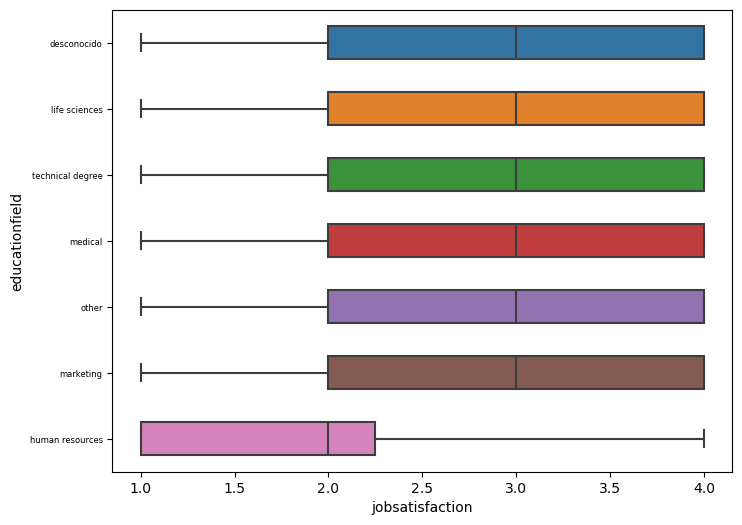

In [53]:
# Crear el boxplot
plt.figure(figsize=(8, 6)) 
sns.boxplot(data = df, width=0.5, y = "educationfield", x = "jobsatisfaction")
 # Ajustar la posición de los ticks en el eje X
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6, ], labels=['desconocido', 'life sciences', 'technical degree', 'medical',
       'other', 'marketing', 'human resources'], fontsize=6)

In [46]:
def intervalo_confianza(dataframe, columna, nivel_confianza = float):
    """
    Calcula el intervalo de confianza para una columna específica en un DataFrame.
    Parámetros:
    -----------
    dataframe : DataFrame
        El DataFrame que contiene los datos de la muestra.
    columna : str
        El nombre de la columna para la cual deseas calcular el intervalo de confianza.
    nivel_confianza : float, opcional
        El nivel de confianza deseado para el intervalo de confianza (valor predeterminado es 0.95).
    Salida:
    -------
    None
        La función imprime en la consola la siguiente información:
        - La media muestral de la columna especificada.
        - El error estándar de la muestra.
        - El nivel de confianza utilizado.
        - El valor crítico calculado a partir de la distribución t de Student.
        - El intervalo de confianza calculado, que incluye el límite inferior y el límite superior.
    """
    # Calcular la media y el error estándar de la muestra
    media = dataframe[columna].mean()
    error = stats.sem(dataframe[columna])
    # calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1.
    grados_libertad = len(df[columna]) - 1
    # Calcular el valor crítico (utilizando la distribución t de Student)
    valor_critico = stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)
    # Calcular el intervalo de confianza
    limite_inferior = media - valor_critico * error
    limite_superior = media + valor_critico * error
    print(f"Intervalo de Confianza para {columna}:")
    print(f"Media Muestral: {np.round(media, 2)}")
    print(f"Error Estándar: {np.round(error, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza}")
    print(f"Valor Crítico: {np.round(valor_critico, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")
